# Log likelihood ratio and p-value 

In this exercise, you will practice skills to calculate -2 loglikelihood ratio as test statistics, and construct test statistics distribution for background-only (null hypothesis) and signal+background model (alternative hypothesis).

There are four tasks in this assignment.


Nmasses: 2050
Nmasses (after selection): 2015


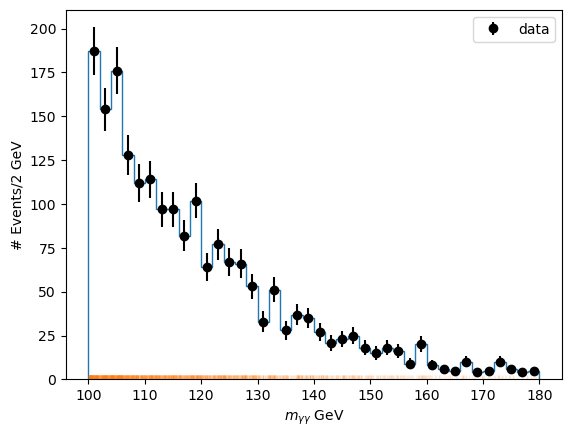

In [1]:
#
# Create a Gaussian signal with Expoential background 
# Calculate logLikelihood ratio distribution given null hypothesis
#
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import poisson
from matplotlib import pyplot as plt

# First, let's create sinal yield of 50 and background yield of 2000
# We will focus on mass range between 100 GeV and 180 GeV
# The bin width of histogram is chosen to be similar to the expected signal width
#
Ns = 50
Nb = 2000
xmin = 100
xmax = 180
nbins= 40
binWidth = (xmax-xmin)/nbins
binCenter=np.array([xmin + binWidth*(interval+0.5) for interval in range(nbins)])

xr = (xmin, xmax)  # xrange

#set random seed to guarantee reproducibility
np.random.seed(seed=1)

# Truth parameter for this exercies
MH_truth = 125.5
Width_truth=2
Alpha_truth=20
fs_truth=Ns/(Ns+Nb)

# signal is normal distribution
xdata = norm.rvs(loc=MH_truth, scale=Width_truth, size=Ns)

# background is exponential distribution
ydata = expon.rvs(loc=xmin, scale=Alpha_truth, size=Nb)

# combine signal and background
masses = np.append(xdata, ydata)

print('Nmasses:', len(masses))
# apply event selection
masses = masses[(xr[0] < masses) & (masses < xr[1])]
print('Nmasses (after selection):', len(masses))

mass_hist, xe = np.histogram(masses, bins=nbins, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')
plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

plt.legend()
plt.show()

# Part I: Event selection practice

Nmasses (after selection): 327


Text(0, 0.5, '# Events/2 GeV')

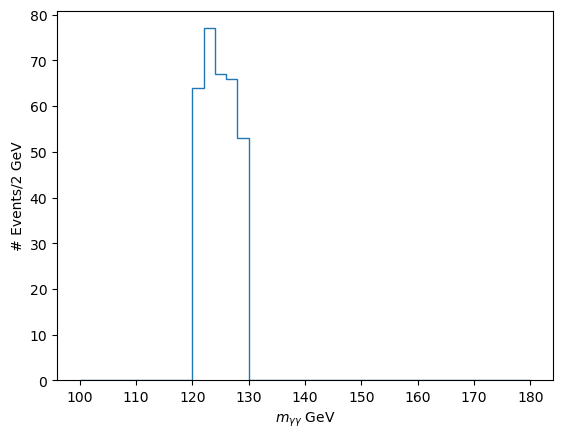

In [12]:
# Task 1 calculate number of masses pass the selection with mass > 120 GeV and mass < 130 GeV 
masses_central = masses[(masses > 120) & (masses < 130)]

NmassPass=  len(masses_central)
print('Nmasses (after selection):', NmassPass)

plt.hist(masses_central,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

[ True  True  True ... False False False]
[128.74869073 124.27648717 124.4436565  123.35406276 127.23081526
 120.89692261 128.98962353 123.9775862  126.13807819 125.00125925
 128.42421587 121.37971858 124.85516559 124.73189129 127.76753888
 123.30021747 125.15514358 123.74428316 125.58442749 126.66563043
 123.29876165 127.78944742 127.30318144 126.50498868 127.3017119
 124.13254428 125.25421955 123.62846113 124.96422384 126.56071093
 124.1166785  124.70649295 124.1256546  123.80958872 124.15750774
 125.4746708  123.2653793  125.9688314  128.81960435 126.98408832
 125.1163289  123.72474207 124.00568341 128.8849092  125.60161551
 124.22600871 125.88183097 129.70051027 125.7403179  126.73440622
 127.79096122 125.8923964  127.80142441 121.7796658  123.48160915
 123.86845053 128.16777735 128.03841141 124.8629203  127.49693414
 124.96469336 127.23795617 127.35608177 122.12681514 127.94755542
 120.40309629 126.56548804 129.58381573 120.52022639 122.73057246
 127.72762839 128.13665176 123.9503

Text(0, 0.5, '# Events/2 GeV')

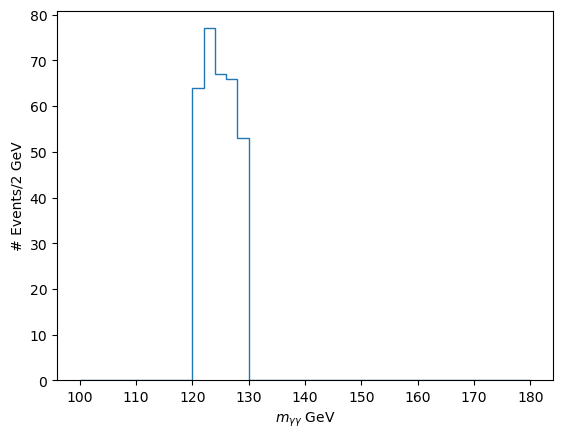

In [14]:
#
# The alternative way to apply selection is to build a mask satisfying selection 
# condition and apply to the original array
#

# Step1 build a mask
mass_mask = np.logical_and(masses>120,masses < 130)

# Let's take a look of the contents of the mass_mask
print(mass_mask)

# Step 2 apply the mask to the masses array
masses_with_mask= masses[mass_mask]

# Let's take a look of the contents of the masses_with_mask
print(masses_with_mask)
print("len(masses):", len(masses), " length of masks:", len(mass_mask), " len(masses with mask) ",len(masses_with_mask))

plt.hist(masses_with_mask,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

# Part2: Quick estimate of significance: S/sqrt(B)

In [15]:
# First we have to define PDF models
def norm_S(x,MH,Width):
    return norm.pdf(x,MH,Width)

def norm_B(x,alpha):
    ainv=1./alpha
    r = expon.pdf(ainv*(x-xmin))
    c = r*ainv/(1.-expon.pdf(ainv*(xmax-xmin)))
    #print(x,alpha,r,c)
    return c 

@np.vectorize
def prob(x,MH,Width,fs,alpha):
    pB = norm_B(x,alpha)
    pS = norm_S(x,MH,Width)
    pTotal = fs*pS+(1.-fs)*pB
    return pTotal


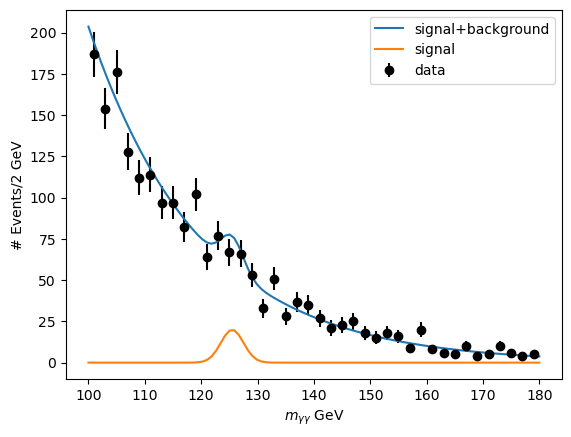

In [16]:
#
# Let's take a look of the agreement between our model and data
#
xspace = np.linspace(xmin,xmax,100)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))
fig =  plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')

plt.plot(xspace,(Ns+Nb)*binWidth*prob(xspace,MH_truth,Width_truth,Ns/(Ns+Nb),Alpha_truth),label='signal+background')
plt.plot(xspace,Ns*binWidth*norm.pdf(xspace,MH_truth,Width_truth),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

binCenter: [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159. 161. 163. 165. 167. 169. 171. 173. 175. 177. 179.]
Ns_predict: [5.17871755e-032 6.56420880e-027 3.06089243e-022 5.25072491e-018
 3.31356873e-014 7.69268975e-011 6.57000909e-008 2.06423549e-005
 2.38593183e-003 1.01452403e-001 1.58698259e+000 9.13245427e+000
 1.93334058e+001 1.50568716e+001 4.31386594e+000 4.54678125e-001
 1.76297841e-002 2.51475364e-004 1.31962160e-006 2.54746898e-009
 1.80914723e-012 4.72655194e-016 4.54276716e-020 1.60620894e-024
 2.08924377e-029 9.99727671e-035 1.75986692e-040 1.13968140e-046
 2.71514240e-053 2.37961819e-060 7.67233342e-068 9.10024685e-076
 3.97085836e-084 6.37413325e-093 3.76411946e-102 8.17732343e-112
 6.53528409e-122 1.92142433e-132 2.07820132e-143 8.26908520e-155]
Nb_predict: [193.79537093 175.35330306 158.66622999 143.56714187 129.90492196
 117.54283418 106.35715459  96.23593315  87.

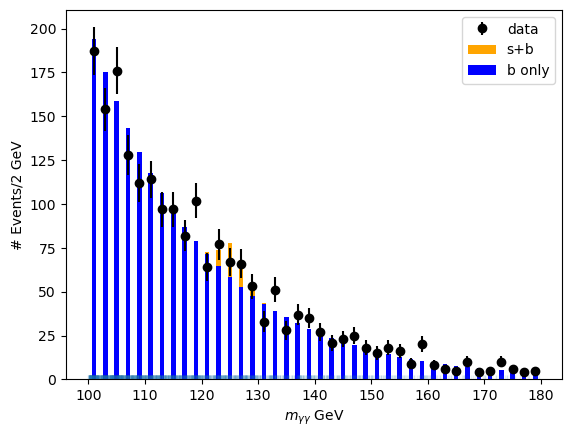

In [17]:
# Instead of plotting continous function, we can create histogram templates based
# on signal PDF and background. Eacn bin of the hisotgram is the expected yields
# from the PDF. When we normalize the PDF to expected yields, we have to take 
# into account the binWidth.
#

#
# The predicted yields is calcualted as function of binCenter
#
Ns_predict = Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
Ns_and_Nb  = Ns_predict+Nb_predict


print("binCenter:",binCenter)
print("Ns_predict:",Ns_predict)
print("Nb_predict:",Nb_predict)
print("Total_predict:",Ns_and_Nb)
print("data:", mass_hist)

#for x in xspace:
#    print(x,prob(x,126.5,2,0,1))
fig =  plt.figure()
plt.cla()
#plt.hist(masses,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
plt.errorbar(cx, mass_hist, mass_hist ** 0.5, fmt="ok",label='data')
plt.bar(binCenter, Ns_and_Nb, color='orange', label='s+b')
plt.bar(binCenter, Nb_predict, color='b', label='b only')
plt.plot(masses, np.zeros_like(masses), "|", alpha=0.1);

#plt.plot(xspace,(Ns+Nb)*prob(xspace,125.5,2,Ns/(Ns+Nb),20),label='signal+background')
#plt.plot(xspace,Ns*norm.pdf(xspace,126.5,2),label='signal')
#plt.axis([100,180,0,0.05])
plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

In [19]:
# The significance is defined as S/sqrt(B)
#    a. without mass selection
#    b. with mass selection
# We will show that the significance is improved after applying mass selection 

# Total predicted yields without any mass selection
Ns_all=sum(Ns_predict)
Nb_all=sum(Nb_predict)
Signifcance_all= Ns_all/Nb_all**.5



In [22]:
# Task 2  Calculate significance from predicted signal and background
# Applying mass selection: mass > 120 and mass < 130
# We can create a mask based on binCenter array and apply the mask to predicted signal/bkg
# Significance is computed as Ns/sqrt(Nb)
#
bin_mask= (binCenter > 120) & (binCenter < 130)
Ns_pass= sum(Ns*binWidth*norm_S(binCenter[bin_mask], MH_truth, Width_truth))
Nb_pass= sum(Nb*binWidth*norm_B(binCenter[bin_mask], Alpha_truth))
Signifcance_pass= Ns_pass+Nb_pass

print("binCenter:",binCenter)
print("binMask:",bin_mask)

print("Ns_all:", Ns,"Nb_pass:", Nb_all,"S/sqrt(B):",Signifcance_all)
print("Ns_pass:", Ns_pass,"Nb_pass:", Nb_pass,"S/sqrt(B):",Signifcance_pass)

binCenter: [101. 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127.
 129. 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155.
 157. 159. 161. 163. 165. 167. 169. 171. 173. 175. 177. 179.]
binMask: [False False False False False False False False False False  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Ns_all: 50 Nb_pass: 1999.166909658168 S/sqrt(B): 1.1182669173508513
Ns_pass: 49.423580250442726 Nb_pass: 294.77700193822176 S/sqrt(B): 344.2005821886645


# Part 3: Calculate p-value using log likelihood ratio 


We plan to calculate p-value of the data given background-only model using log likelihood ratio as test statistics 

In [23]:
#
# Step1. Define binned log likelihood
#
def neg_binned_logL(pars,data_hist):
    MH=pars[0]
    Width=pars[1]
    fs=pars[2]
    alpha=pars[3]
    N=sum(data_hist)
    Ns_predict = N*fs*binWidth*norm_S(binCenter,MH,Width)
    Nb_predict = N*(1.-fs)*binWidth*norm_B(binCenter,alpha)
    N_predict  = Ns_predict+Nb_predict

    output= -2*sum( [ n_obs*np.log(n_predict) - n_predict for n_obs, n_predict in zip(data_hist, N_predict) ] )
    return output

In [24]:
#
# Step2. Calculate test statistics of the data
# 
parB=[MH_truth, Width_truth, 0, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs_truth, Alpha_truth]

t0 = neg_binned_logL(parB,mass_hist) - neg_binned_logL(parSandB,mass_hist)

print("data test statistics:",t0)

data test statistics: 5.266519380509635


toy test statistics 1: [-5.01010869]


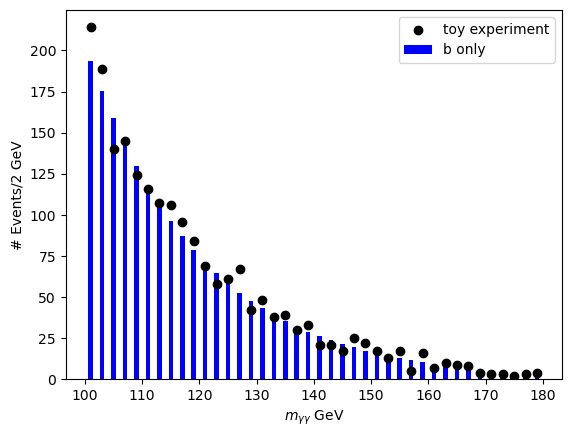

In [25]:
# Step3. Generate one Toy experiment from background only model
#   Obtain predicted Poisson yields in each bin 
#   
np.random.seed(6) # make sure we always generate the same
toy_hist1 = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]

# Calcualte test statistics of the toy experiment
toy_t1 = neg_binned_logL(parB,toy_hist1) - neg_binned_logL(parSandB,toy_hist1)

print("toy test statistics 1:", toy_t1)

plt.scatter(binCenter, toy_hist1, zorder=10, color='k', label='toy experiment')
plt.bar(binCenter, Nb_predict, color='b', label='b only')

#plt.plot(toydata, np.zeros_like(toydata), "|", alpha=0.1);

plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()

plt.show()

toy test statistics 2: [-5.01010869]


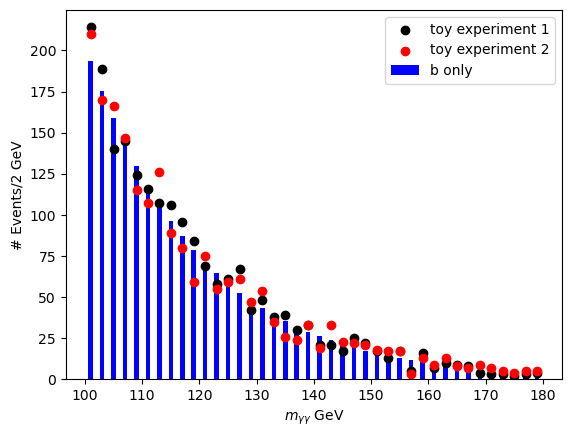

In [26]:
#
# Task 3 
# Generate a second Toy experiment and calculate the corresponindg test statistics
#

# generete experiment
toy_hist2 = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
# calculate test statistics
toy_t2 = neg_binned_logL(parB,toy_hist1) - neg_binned_logL(parSandB,toy_hist1)

print("toy test statistics 2:", toy_t2)

plt.scatter(binCenter, toy_hist1, zorder=10, color='k', label='toy experiment 1')
plt.scatter(binCenter, toy_hist2, zorder=10, color='red', label='toy experiment 2')
plt.bar(binCenter, Nb_predict, color='b', label='b only')

#plt.plot(toydata, np.zeros_like(toydata), "|", alpha=0.1);

plt.xlabel("$m_{\gamma\gamma}$ GeV")
plt.ylabel("# Events/%.1g GeV"%binWidth)

#plt.title("$\hat{m}_{H}=%.2f,\hat{f}_{S}=%.3f,\hat{\\alpha}=%.2f$"%(res.x[0],res.x[1],res.x[2]))
plt.legend()
plt.show()

In [42]:
#
# Generate 10K toy experiments from background only hypothesis
# calculate test statistics from each experiment
#
from tqdm import tqdm
Ntoys=10000
h0_test=np.zeros(Ntoys)
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h0_test[i]=t0

   
#print(h0_test)

100%|██████████| 10000/10000 [00:23<00:00, 434.04it/s]


-5.475881038775697


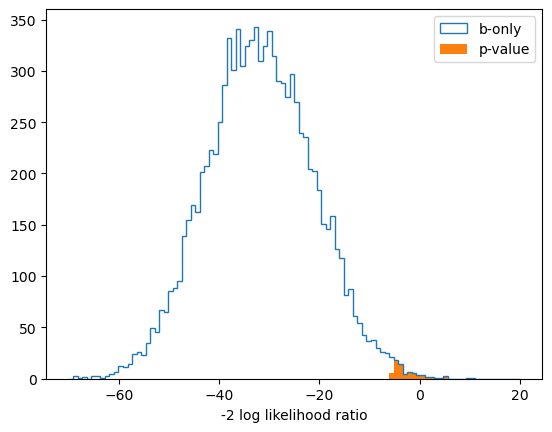

In [43]:
# 
# Let's visualize the distribution
#  p-value is the shaded area with -2 log likelihood ratio greater or equal to the observed
#

t_data = neg_binned_logL(parB,mass_hist) - neg_binned_logL(parSandB,mass_hist)
print(t_data)

plt.hist(h0_test,bins=100,range=[-70,20],histtype='step',label='b-only')
plt.hist(h0_test[h0_test>t_data],bins=100,range=[-70,20],label='p-value')

plt.xlabel("-2 log likelihood ratio")
plt.legend()
plt.show()

In [44]:
# Task 4
# p-value is the fraction of toy experiments with test statistics >= observed test statistics
# We can compare this results to the simple counting method S/sqrt(B)

# Calculate p-value
pvalue = len(h0_test[h0_test>t_data]) / len(h0_test)

# one-tailed
n_sigma_one_tailed = norm.ppf(1-pvalue)

print("p-value:",pvalue)
print("significance (1 tailed):",n_sigma_one_tailed)
print("significance (counting):",Signifcance_pass)

p-value: 0.0075
significance (1 tailed): 2.432379058584449
significance (counting): 344.2005821886645


# Part4: Compare test statistics distributions: bkg vs sig+bkg

In [34]:
#S=50
Ns=50
Nb=2000
fs=Ns/(Ns+Nb)

Ns_predict = Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
Ns_and_Nb  = Ns_predict+Nb_predict

parB=[MH_truth, Width_truth, 0, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs, Alpha_truth]

from tqdm import tqdm
Ntoys=10000
h0_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h0_test.append(t0[0])

h1_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Ns_and_Nb) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h1_test.append(t0[0])


100%|██████████| 10000/10000 [00:57<00:00, 173.33it/s]


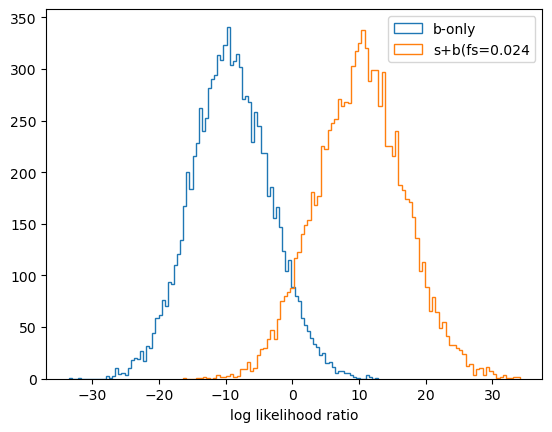

In [36]:
plt.hist(h0_test,bins=100,histtype='step',label='b-only')
plt.hist(h1_test,bins=100,histtype='step',label='s+b(fs=%.2g'%fs)

#plt.show()
#plt.hist(t_test,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.axis([100,180,0,0.05])
plt.xlabel("log likelihood ratio")
plt.legend()
plt.show()

# Part 5: Test statistics with smaller signal fraction

In [37]:
#S=20
Ns=25
Nb=2000
fs=Ns/(Ns+Nb)

Ns_predict = Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
Ns_and_Nb  = Ns_predict+Nb_predict

parB=[MH_truth, Width_truth, 0, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs, Alpha_truth]

from tqdm import tqdm
Ntoys=10000
h0_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h0_test.append(t0[0])

h1_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Ns_and_Nb) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h1_test.append(t0[0])


100%|██████████| 10000/10000 [00:25<00:00, 397.97it/s]


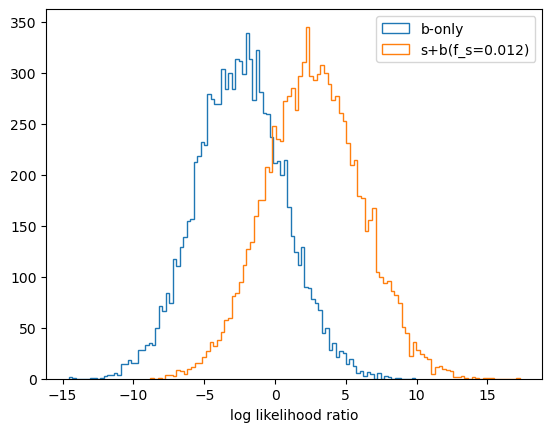

In [38]:
plt.hist(h0_test,bins=100,histtype='step',label='b-only')
plt.hist(h1_test,bins=100,histtype='step',label='s+b(f_s=%.2g)'%fs)

#plt.show()
#plt.hist(t_test,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.axis([100,180,0,0.05])
plt.xlabel("log likelihood ratio")
plt.legend()
plt.show()

# Part 6: Test statistics with larger signal fraction

In [39]:
#S=100
Ns=100
Nb=2000
fs=Ns/(Ns+Nb)

Ns_predict = Ns*binWidth*norm_S(binCenter,MH_truth,Width_truth)
Nb_predict = Nb*binWidth*norm_B(binCenter,Alpha_truth)
Ns_and_Nb  = Ns_predict+Nb_predict

parB=[MH_truth, Width_truth, 0, Alpha_truth]
parSandB=[MH_truth, Width_truth, fs, Alpha_truth]

from tqdm import tqdm
Ntoys=10000
h0_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Nb_predict) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h0_test.append(t0[0])

h1_test=[]
for i in tqdm(range(Ntoys)):
    toy_hist = [ np.random.poisson(nb) for nb in zip(Ns_and_Nb) ]
    t0 = neg_binned_logL(parB,toy_hist) - neg_binned_logL(parSandB,toy_hist)
    h1_test.append(t0[0])

100%|██████████| 10000/10000 [00:22<00:00, 437.98it/s]


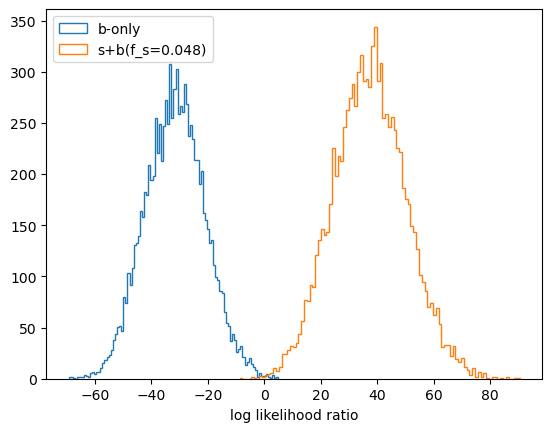

In [40]:
plt.hist(h0_test,bins=100,histtype='step',label='b-only')
plt.hist(h1_test,bins=100,histtype='step',label='s+b(f_s=%.2g)'%fs)

#plt.show()
#plt.hist(t_test,bins=nbins,range=(xmin,xmax),histtype='step',density=False)
#plt.axis([100,180,0,0.05])
plt.xlabel("log likelihood ratio")
plt.legend()
plt.show()